In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as smt
from matplotlib import pyplot as plt
from datetime import datetime as dt


#reading data into dataframes
bc = pd.read_csv("BTC-USD3.csv", index_col=0, parse_dates=True)
usd = pd.read_csv("USDIndex3.csv", index_col=0, parse_dates=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#displaying bitcoin dataframe
bc = bc.drop(bc.columns[[0,1,2,4]], axis=1)
bc.tail()

,Close,Volume
Date,,
2021-05-19,37002.441406,1.263581e+11
2021-05-20,40782.738281,8.828194e+10
2021-05-21,37304.691406,8.205162e+10
2021-05-22,37536.632813,5.737727e+10
2021-05-23,31903.390625,6.061471e+10


In [ ]:
#displaying usd dataframe
usd = usd.drop(usd.columns[[1,2,3,4,5]], axis=1)
usd.head()

,Price
Date,
2021-05-21,90.005
2021-05-20,89.795
2021-05-19,90.191
2021-05-18,89.734
2021-05-17,90.142


In [ ]:
print(bc.shape)
print(usd.shape)

(1827, 2)
(1291, 1)


In [ ]:
bc.isnull().sum()

Close     4
Volume    4
dtype: int64

In [ ]:
bc=bc.fillna(bc.mean())
bc.isnull().sum()

Close     0
Volume    0
dtype: int64

In [ ]:
usd.isnull().sum()

Price    0
dtype: int64

In [ ]:
bc.describe()

,Close,Volume
count,1827.000000,1.827000e+03
mean,9891.859719,1.662041e+10
std,12387.223853,2.107093e+10
min,444.154999,3.397780e+07
25%,3461.583741,1.682985e+09
50%,7200.174316,7.713020e+09
75%,10123.864746,2.386838e+10
max,63503.457031,3.509679e+11


In [ ]:
usd.describe()

,Price
count,1291.000000
mean,95.538398
std,3.209239
min,88.505000
25%,93.233500
50%,95.831000
75%,97.592500
max,103.605000


In [ ]:
bc.corr()

,Close,Volume
Close,1.00000,0.76543
Volume,0.76543,1.00000


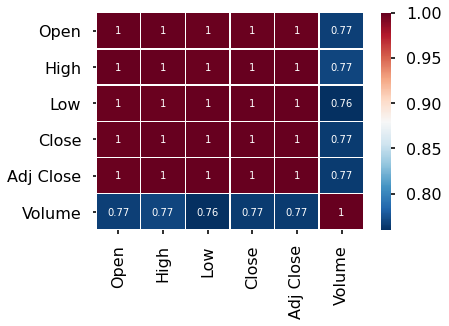

In [ ]:
pccorr = bc.corr(method='pearson')
sns.heatmap(pccorr,
xticklabels=pccorr.columns,
yticklabels=pccorr.columns,
cmap='RdBu_r',
annot=True,
linewidth=0.5)
plt.show()

In [ ]:
join = bc
for x in join.index.values:
    for x2 in usd.index.values:
        if x == x2:
            itemindex = np.where(usd.index==x2)[0][0]
            val = usd.at[x2, "Price"]
            join.at[x, 'Price'] = val
join.head()

,Close,Volume,Price
Date,,,
2016-05-23,444.154999,50582500.0,95.216
2016-05-24,445.980988,65783100.0,95.576
2016-05-25,449.598999,65231000.0,95.340
2016-05-26,453.384003,65203800.0,95.162
2016-05-27,473.463989,164780992.0,95.500


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f367ac18e90>,
      dtype=object)

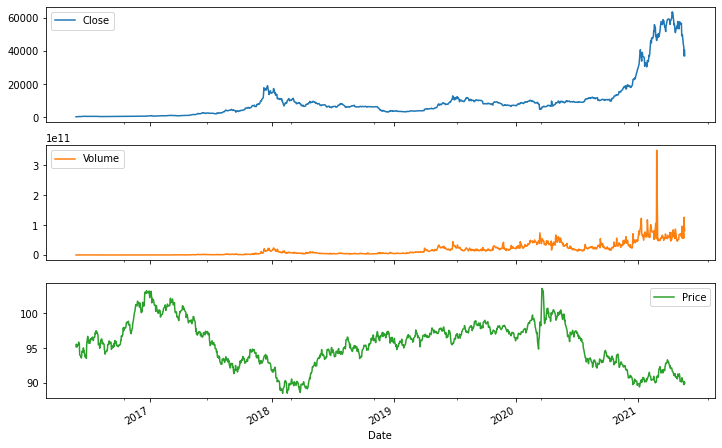

In [ ]:
join = join.dropna()
join.plot(subplots=True, figsize=(12,8))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

KeyError: ignored

In [ ]:
def plotcharts(y, title, lags=None, figsize=(12,8)):
    fig = plt.figure(figsize=figsize)
    layout = (2,2)
    ts_ax = plt.subplot2grid(layout, (0,0))
    hist_ax = plt.subplot2grid(layout, (0,1))
    acf_ax = plt.subplot2grid(layout, (1,0))
    pacf_ax = plt.subplot2grid(layout, (1,1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=14, fontweight="bold")
    y.plot(ax=hist_ax, kind="hist", bins=25)
    hist_ax.set_title("Histogram")
    smt.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

In [ ]:
series = join

In [ ]:
series= pd.read_csv("BTC-INR.csv")

In [ ]:
num_var = len(series.iloc[1,:])
for i in range(0, num_var):
    plotcharts(series.iloc[:,i].dropna(), title=series.columns[i], lags=48)

NameError: ignored

**Transformation**

In [ ]:
#log transformation
# Converting the data to a logarithmic scale
log = pd.DataFrame(np.log(series))

# Differencing the log values
#1
log_diff = log.diff().dropna()
#2
log_diff = log_diff.diff().dropna()
log_diff.plot(subplots=True)

#normalization
#importing minmaxscaler 
from sklearn.preprocessing import MinMaxScaler

#creating minmaxscaler object
norm = MinMaxScaler()

#applying norm to dataframe
join_norm = pd.DataFrame(norm.fit_transform(log_diff), columns=log_diff.columns)
join_norm

NameError: ignored

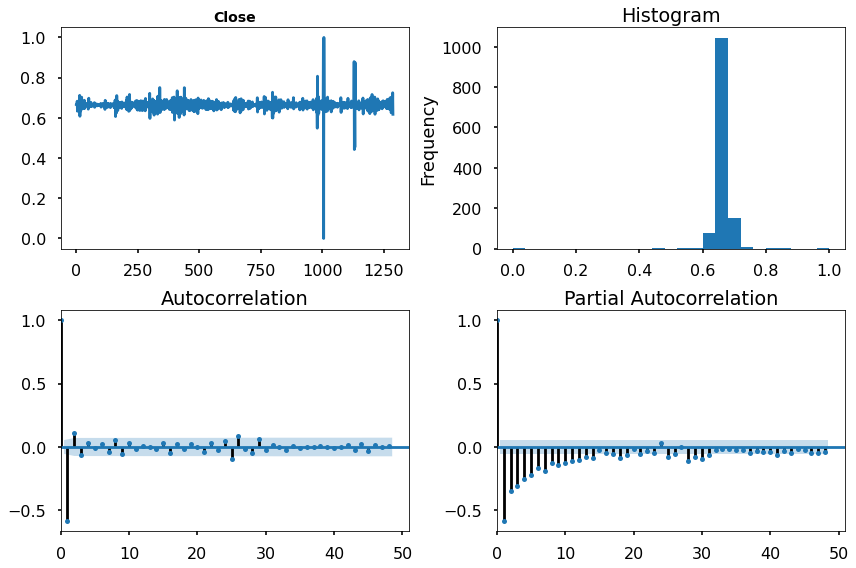

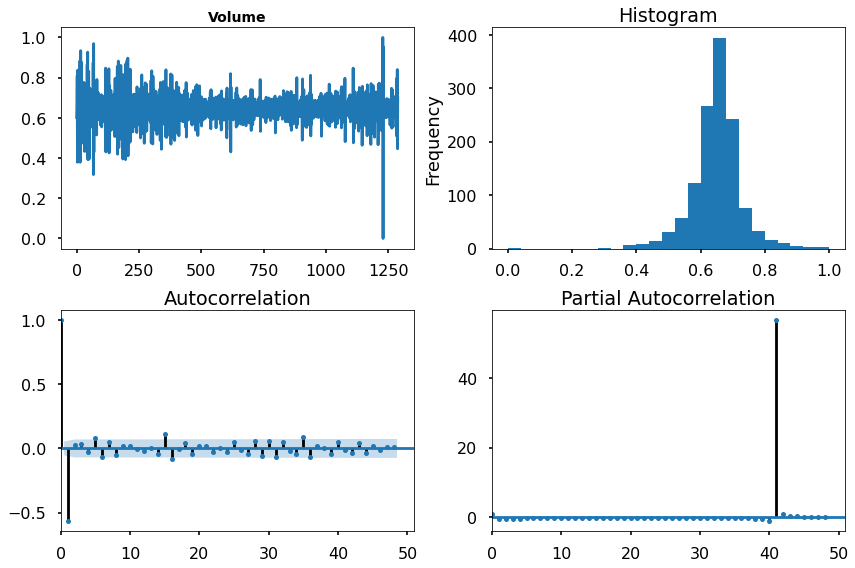

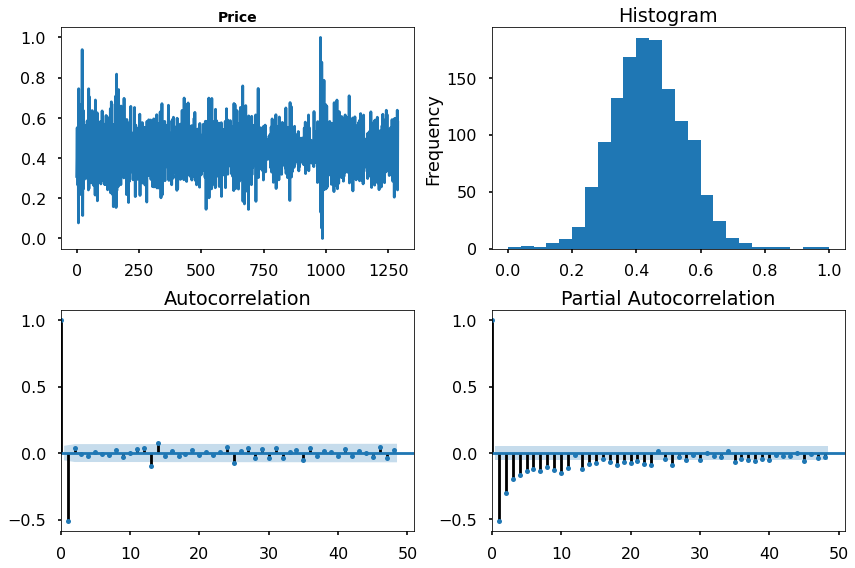

In [ ]:
num_var = len(join_norm.iloc[1,:])
for i in range(0, num_var):
    plotcharts(join_norm.iloc[:,i].dropna(), title=join_norm.columns[i], lags=48)

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag= "AIC")
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num of Observations Used For ADF Regression and Critical Values Calculation : ", dftest[3])
    print("5. Critical Values : ")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)
        
ad_test(log_diff["Close"])
print("--------------------------------------------")
ad_test(log_diff["Volume"])
print("--------------------------------------------")
ad_test(log_diff["Price"])

1. ADF :  -14.46070290709489
2. P-Value :  6.854916212718935e-27
3. Num Of Lags :  18
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  1270
5. Critical Values : 
	 1% :  -3.435509501237317
	 5% :  -2.86381847140403
	 10% :  -2.5679830801661603
--------------------------------------------
1. ADF :  -13.380937254703408
2. P-Value :  4.979546547292746e-25
3. Num Of Lags :  23
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  1265
5. Critical Values : 
	 1% :  -3.435529936129535
	 5% :  -2.863827487792138
	 10% :  -2.5679878818603634
--------------------------------------------
1. ADF :  -14.91305587121193
2. P-Value :  1.4487709481596022e-27
3. Num Of Lags :  22
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  1266
5. Critical Values : 
	 1% :  -3.4355258362116787
	 5% :  -2.8638256788102323
	 10% :  -2.567986918482913


**Models**

**1)Vector Autoregressive (AR) Model** VAR models (vector autoregressive models) are used for multivariate time series. The structure is that each variable is a linear function of past lags of itself and past lags of the other variables.

In [ ]:
# Splitting the dataset into train & test subsets
n_obs = 7
train, test = log_diff[:-n_obs], log_diff[-n_obs:]
log_diff.head()

,Close,Volume,Price
Date,,,
2016-05-25,0.003977,-0.271185,-0.006246
2016-05-26,0.000304,0.008011,0.000604
2016-05-27,0.034953,0.927517,0.005414
2016-05-30,0.076729,-1.554849,-0.003546
2016-05-31,-0.124718,1.081392,0.003950


In [ ]:
# Fitting the VAR model
from statsmodels.tsa.api import VAR

model = VAR(log_diff)
results = model.fit(maxlags = 22, ic = 'aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 23, May, 2021
Time:                     16:41:00
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -18.0960
Nobs:                     1269.00    HQIC:                  -18.5594
Log likelihood:           6733.90    FPE:                6.58869e-09
AIC:                     -18.8381    Det(Omega_mle):     5.72307e-09
--------------------------------------------------------------------
Results for equation Close
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -0.000573         0.002225           -0.258           0.797
L1.Close          -1.203305         0.029012          -41.476           0.000
L1.Volume          0.024493         0.009328            2.626           

After fitting the model, we see the results of the model. It provides the coefficient and other stats.

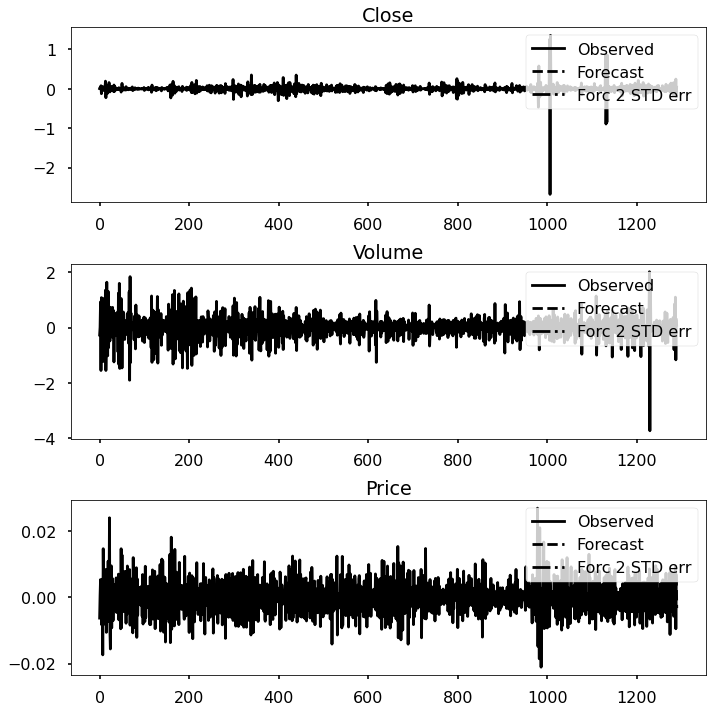

In [ ]:
lag_order = results.k_ar
predicted = results.forecast(log_diff.values[-lag_order:],n_obs)
forecast = pd.DataFrame(predicted, index = log_diff.index[-n_obs:], columns = log_diff.columns)


# Plotting the Forecasted values
p1 = results.plot_forecast(1)
p1.tight_layout()

In [ ]:
#Inverting the Differencing Transformation
def invert_transformation(df, df_forecast, second_diff):
    for col in df.columns:
        # Undo the 2nd Differencing
        if second_diff:
            df_forecast[str(col)] = (df[col].iloc[-1] - df[col].iloc[-2]) + df_forecast[str(col)].cumsum()
        # Undo the 1st Differencing
        df_forecast[str(col)] = df[col].iloc[-1] + df_forecast[str(col)].cumsum()

    return df_forecast

forecast_values = invert_transformation(train, forecast, second_diff=True)
forecast_values

,Close,Volume,Price
Date,,,
2021-05-13,-0.254110,0.957524,0.010903
2021-05-14,-0.422128,1.456020,0.015538
2021-05-17,-0.557403,2.333063,0.019607
2021-05-18,-0.702911,2.922902,0.024181
2021-05-19,-0.812042,3.668205,0.028197
2021-05-20,-0.951860,4.260737,0.032786
2021-05-21,-1.081552,4.922192,0.036359


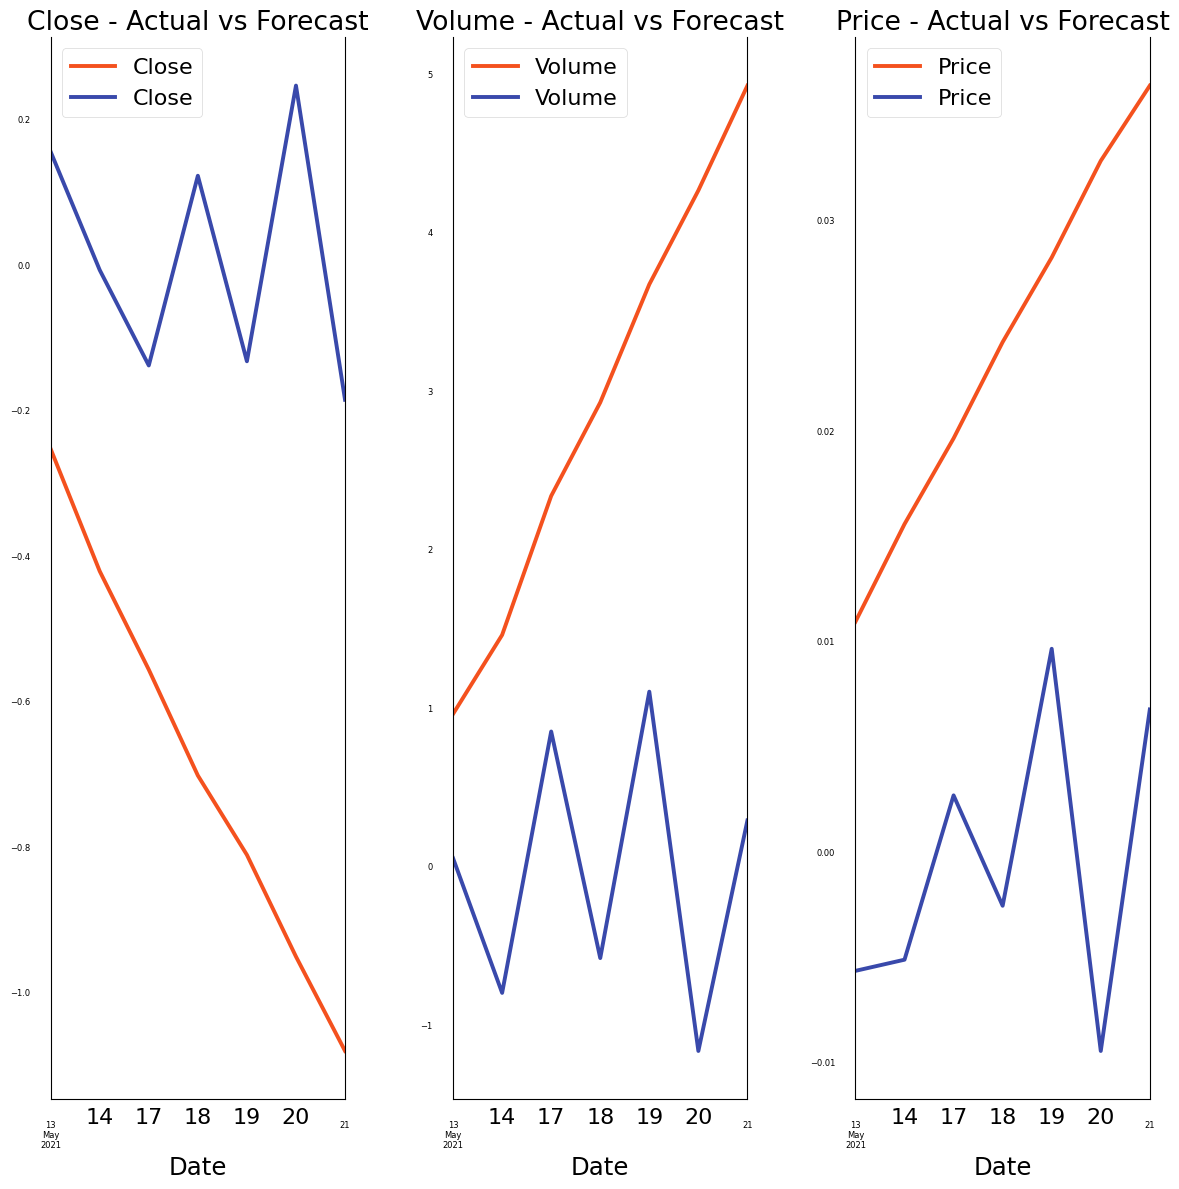

In [ ]:
# Actual vs Forecasted Plots
fig, axes = plt.subplots(nrows = int(len(log_diff.columns)/2), ncols = 3, dpi = 100, figsize = (12,12))

for i, (col,ax) in enumerate(zip(log_diff.columns, axes.flatten())):
    forecast_values[col].plot(color = '#F4511E', legend = True, ax = ax).autoscale(axis =' x',tight = True)
    test[col].plot(color = '#3949AB', legend = True, ax = ax)

    ax.set_title(col + ' - Actual vs Forecast')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize = 6)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from numpy import asarray as arr
mse = mean_squared_error(test, forecast_values)
print("\nMean Squared Error: ", mse)


Mean Squared Error:  3.9005835262023023


**XGBoost**

Usually, ARIMA regressions are used in classical statistical approaches, when the goals not just prediction, but also understanding on how different explanatory variables relate with the dependent variable and with each other. ARIMA are thought specifically for time series data.

On the contrary, XGBoost models are used in pure Machine Learning approaches, where we exclusively care about quality of prediction. XGBoost regressors can be used for time series forecast, even though they are not specifically meant for long term forecasts. But they can work.

In [ ]:
#importing xgboost and train_test_split
import xgboost as xgb
from sklearn.model_selection import train_test_split

#displaying dataset
log_diff.head()

,Close,Volume,Price
Date,,,
2016-05-25,0.003977,-0.271185,-0.006246
2016-05-26,0.000304,0.008011,0.000604
2016-05-27,0.034953,0.927517,0.005414
2016-05-30,0.076729,-1.554849,-0.003546
2016-05-31,-0.124718,1.081392,0.003950


In [ ]:
# Splitting the dataset into train & test subsets
X, y = log_diff.iloc[:,:], log_diff.iloc[:,:-2]

data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 1, alpha = 10, n_estimators = 200)

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[16:57:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.021048


In [ ]:
data_dmatrix

**Cross Validation (K-fold)**

Since XGBoost is not specific for time series data in order to build more robust models, it is common to do a k-fold cross validation where all the entries in the original training dataset are used for both training as well as validation. Also, each entry is used for validation just once. XGBoost supports k-fold cross validation via the cv() method. All you have to do is specify the nfolds parameter, which is the number of cross validation sets you want to build.

In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1, 'max_depth': 2, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[16:59:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:59:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:59:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.467236,0.004426,0.467178,0.009019
1,0.424630,0.005017,0.424553,0.009726
2,0.386724,0.005726,0.386663,0.010437
3,0.352910,0.006152,0.352768,0.011498
4,0.322789,0.006942,0.322626,0.012283


In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.097202
Name: test-rmse-mean, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8c8b9c090>,
      dtype=object)

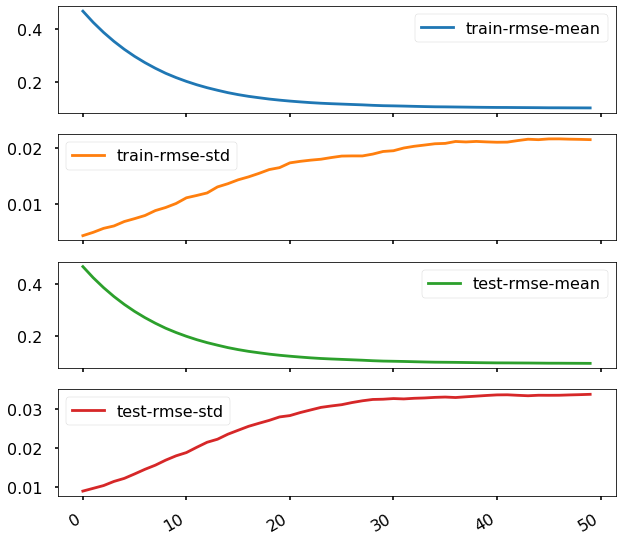

In [ ]:
cv_results.plot(subplots=True, figsize=(10,10))

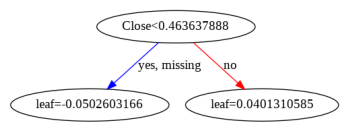

In [ ]:
xgb.plot_tree(xg_reg, num_trees=0)
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(xg_reg, {'max_depth': [2,4,6],'n_estimators': [50, 100, 200]}, verbose=1,n_jobs=2)
clf.fit(X, y)

print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


[17:01:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.7879727674240937
{'max_depth': 2, 'n_estimators': 200}


[Parallel(n_jobs=2)]: Done  45 out of  45 | elapsed:    3.1s finished


**Facebook Prophet**

Facebook prophet was created to work as a tool for most general time series predictions.Facebook prophet is able to visualize significant features in the time series such as trends, outliers, seasonality, etc. Also, the forecasting method is robust enough to handle any missing values.

In [ ]:
#importing prophet and fitting model
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

In [ ]:
#functions to automate prophet charts for each series
def fit_model(df):
    m = Prophet(daily_seasonality=True)
    m.fit(df)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    return m, forecast, future

def fb_plots(m, fore):
    return plot_plotly(m, forecast)

def fb_subplots(m, fore):
    return m.plot(forecast), m.plot_components(forecast)

Bitcoin Closing File Forecast 

In [ ]:
bc = pd.read_csv("BTC-USD3.csv")


In [ ]:
bc.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [ ]:
bc=bc.fillna(bc.mean())
bc.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
bc_price = bc.drop(bc.columns[[1,2,3,5,6]], axis=1)
bc_vol = bc.drop(bc.columns[[1,2,3,4,5]], axis=1)
bc_price.columns = ["ds","y"]
bc_vol.columns = ["ds","y"]
bc_price.head()

,ds,y
0,2016-05-23,444.154999
1,2016-05-24,445.980988
2,2016-05-25,449.598999
3,2016-05-26,453.384003
4,2016-05-27,473.463989


In [ ]:
model, forecast, future = fit_model(bc_price)

In [ ]:
future.tail()

,ds
2187,2022-05-19
2188,2022-05-20
2189,2022-05-21
2190,2022-05-22
2191,2022-05-23


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
2185,2022-05-17,104859.172586,83803.373319,125003.855882
2186,2022-05-18,104892.780241,84688.958519,124975.708331
2187,2022-05-19,104924.601157,84673.236934,125091.354260
2188,2022-05-20,105042.818946,84593.297348,125411.546563
2189,2022-05-21,105135.922042,85263.957358,124891.783928
2190,2022-05-22,105142.031525,85151.078974,125553.971871
2191,2022-05-23,105346.860708,84960.915179,125296.897917


In [ ]:
metric_bc= forecast.set_index('ds')[['yhat']].join(bc_price.set_index('ds').y).reset_index()

In [ ]:
metric_bc.dropna(inplace=True)

In [ ]:
pip install scikit-learn scipy

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
r2_score(metric_bc.y, metric_bc.yhat)

0.931761898693823

In [ ]:
mean_squared_error(metric_bc.y, metric_bc.yhat)

10464949.380877443

In [ ]:
fb_plots(model, forecast)

The forecast is expecting bitcoin to continue falling in value. There has a been a new down moves at the end of 2021 that added to this prediction.

(<Figure size 720x432 with 1 Axes>, <Figure size 648x864 with 4 Axes>)

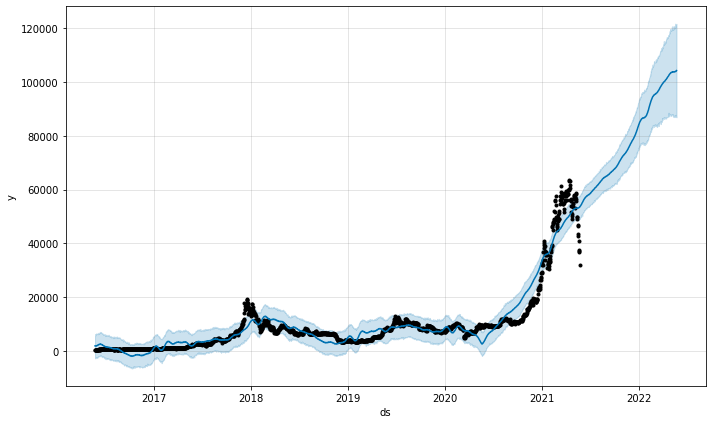

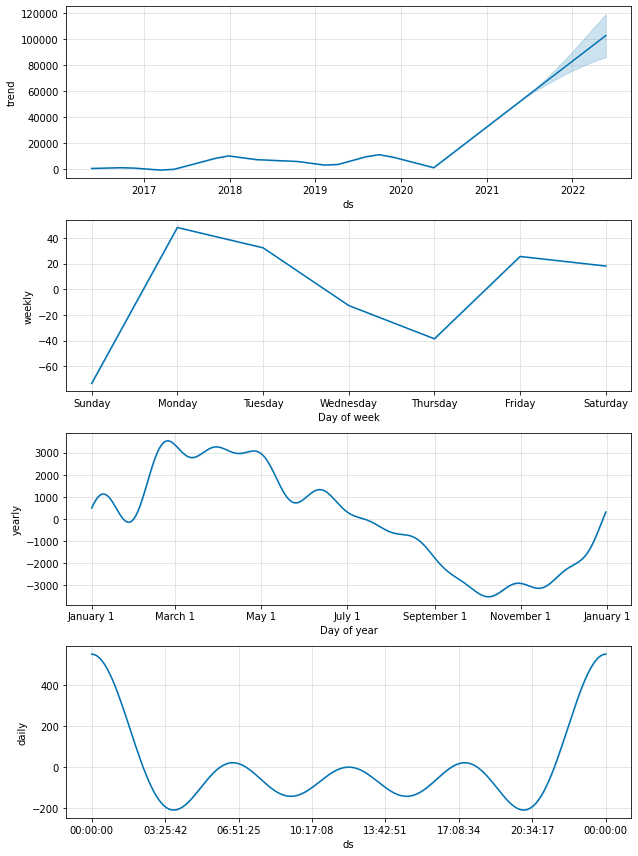

In [ ]:
fb_subplots(model, forecast)

**US PRICE FORECAST**

In [ ]:
usd = pd.read_csv("USDIndex3.csv")
usd = usd.drop(usd.columns[[2,3,4,5,6]], axis=1)
usd.columns = ["ds","y"]
usd.head()

,ds,y
0,"May 21, 2021",90.005
1,"May 20, 2021",89.795
2,"May 19, 2021",90.191
3,"May 18, 2021",89.734
4,"May 17, 2021",90.142


In [ ]:
model, forecast, future = fit_model(usd)

In [ ]:
future.tail()

,ds
1651,2022-05-17
1652,2022-05-18
1653,2022-05-19
1654,2022-05-20
1655,2022-05-21


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1651,2022-05-17,82.545762,62.300530,103.236036
1652,2022-05-18,82.512374,62.531200,103.598109
1653,2022-05-19,82.464939,62.287735,103.441168
1654,2022-05-20,82.408731,62.152590,103.649354
1655,2022-05-21,82.545516,62.567903,103.361233


In [ ]:
metric_usd= forecast.set_index('ds')[['yhat']].join(usd.set_index('ds').y).reset_index()

In [ ]:
metric_usd.dropna(inplace=True)

In [ ]:
r2_score(metric_usd.y, metric_usd.yhat)

0.9424398708981777

In [ ]:
mean_squared_error(metric_bc.y, metric_bc.yhat)


10464949.380877443

In [ ]:
fb_plots(model, forecast)

(<Figure size 720x432 with 1 Axes>, <Figure size 648x864 with 4 Axes>)

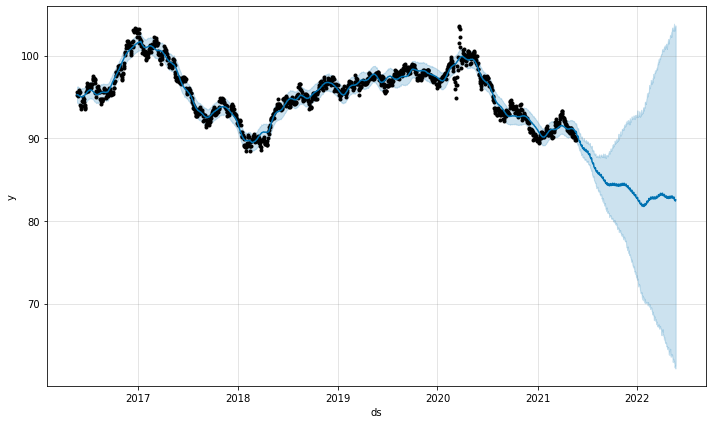

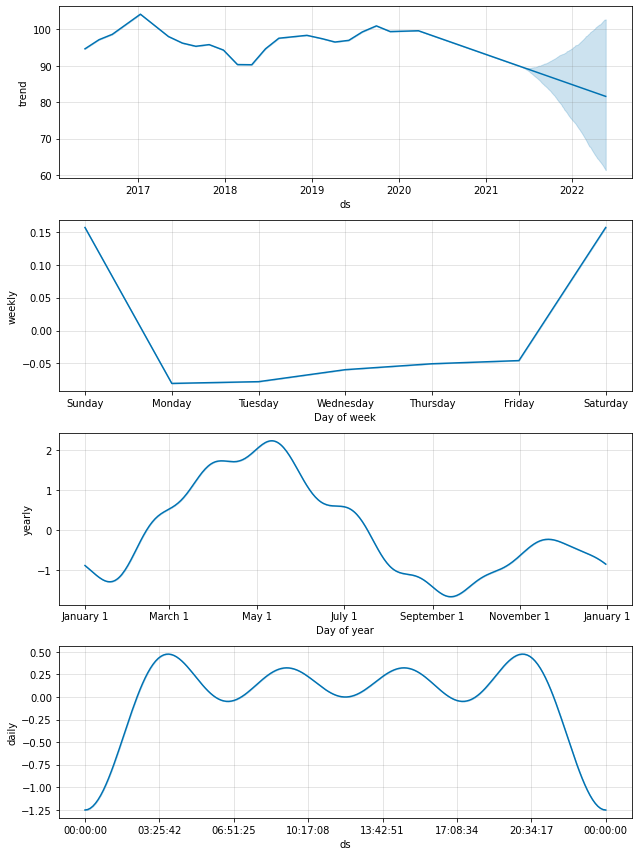

In [ ]:
fb_subplots(model, forecast)

**Bitcoin Volume Forecast**

In [ ]:
bc_vol.head()

,ds,y
0,2016-05-23,50582500.0
1,2016-05-24,65783100.0
2,2016-05-25,65231000.0
3,2016-05-26,65203800.0
4,2016-05-27,164780992.0


In [ ]:
model, forecast, future = fit_model(bc_vol)

In [ ]:
future.tail()

,ds
2187,2022-05-19
2188,2022-05-20
2189,2022-05-21
2190,2022-05-22
2191,2022-05-23


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2187,2022-05-19,1.062654e+11,8.399506e+10,1.276494e+11
2188,2022-05-20,1.064719e+11,8.417814e+10,1.263321e+11
2189,2022-05-21,1.029652e+11,8.101600e+10,1.255866e+11
2190,2022-05-22,1.027115e+11,8.217471e+10,1.236004e+11
2191,2022-05-23,1.043047e+11,8.049056e+10,1.265825e+11


In [ ]:
fb_plots(model, forecast)

(<Figure size 720x432 with 1 Axes>, <Figure size 648x864 with 4 Axes>)

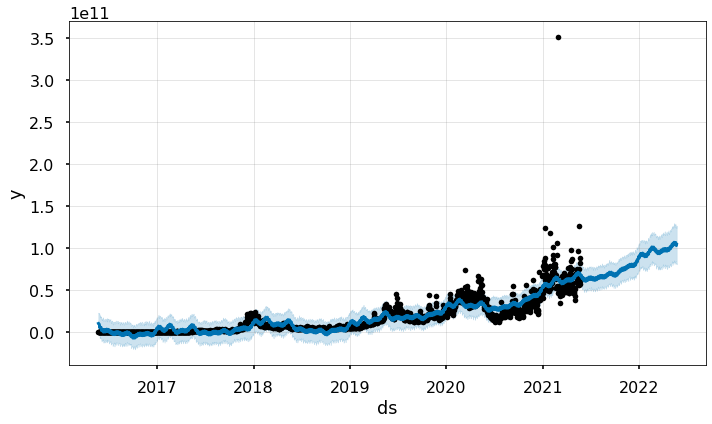

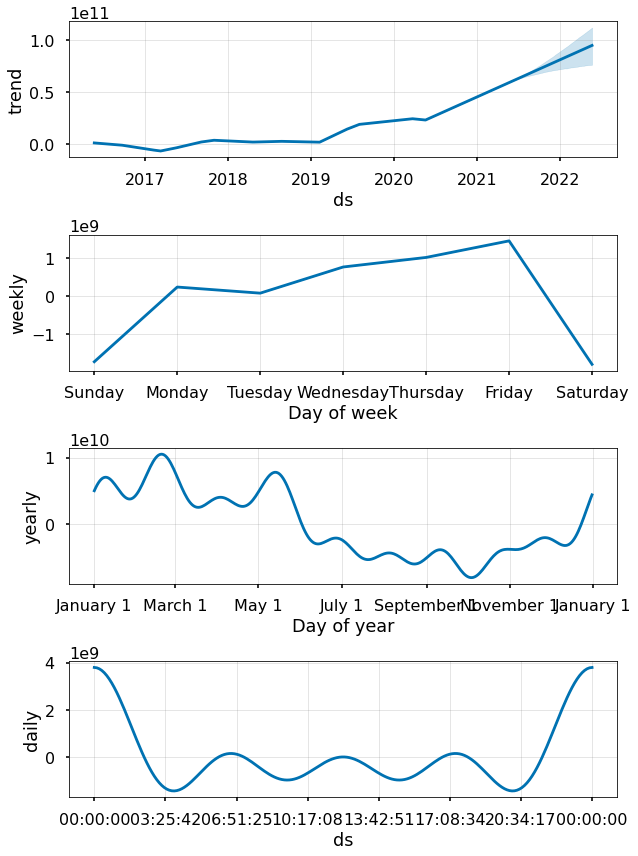

In [ ]:
fb_subplots(model, forecast)

# **INR PROPHET**

In [ ]:
INR= pd.read_csv("BTC-INR.csv")
INR

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-18,7.349759e+05,7.314907e+05,7.254785e+05,7.259610e+05,7.259610e+05,1.151007e+12
1,2019-09-19,7.261210e+05,7.350398e+05,7.033428e+05,7.329512e+05,7.329512e+05,1.423414e+12
2,2019-09-20,7.329443e+05,7.324158e+05,7.214724e+05,7.249939e+05,7.249939e+05,1.049163e+12
3,2019-09-21,7.251369e+05,7.254537e+05,7.121104e+05,7.134639e+05,7.134639e+05,9.559595e+11
4,2019-09-22,7.137771e+05,7.173071e+05,7.064909e+05,7.170186e+05,7.170186e+05,9.398239e+11
...,...,...,...,...,...,...,...
617,2021-05-27,2.857266e+06,2.931486e+06,2.710549e+06,2.793747e+06,2.793747e+06,3.140740e+12
618,2021-05-28,2.798843e+06,2.824332e+06,2.517783e+06,2.584282e+06,2.584282e+06,3.996146e+12
619,2021-05-29,2.583308e+06,2.695543e+06,2.439228e+06,2.505985e+06,2.505985e+06,3.274440e+12
620,2021-05-30,2.505358e+06,2.635179e+06,2.426690e+06,2.582874e+06,2.582874e+06,2.290979e+12


In [ ]:
bc=bc.fillna(bc.mean())
bc.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
INR = INR.drop(INR.columns[[1,2,3,5,6]], axis=1)
INR.columns = ["ds","y"]
INR.head()

,ds,y
0,2019-09-18,725961.0000
1,2019-09-19,732951.1875
2,2019-09-20,724993.9375
3,2019-09-21,713463.9375
4,2019-09-22,717018.5625


In [ ]:
model, forecast, future = fit_model(INR)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
INR.tail()

,ds,y
617,2021-05-27,2793746.75
618,2021-05-28,2584281.75
619,2021-05-29,2505985.25
620,2021-05-30,2582873.75
621,2021-05-31,2587267.25


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
982,2022-05-27,8.137819e+06,6.374867e+06,1.013943e+07
983,2022-05-28,8.145300e+06,6.406770e+06,1.018184e+07
984,2022-05-29,8.141740e+06,6.311570e+06,1.028966e+07
985,2022-05-30,8.156795e+06,6.378260e+06,1.020237e+07
986,2022-05-31,8.184408e+06,6.514173e+06,1.016485e+07


In [ ]:
metric_INR = forecast.set_index('ds')[['yhat']].join(INR.set_index('ds').y).reset_index()

In [ ]:
metric_INR.dropna(inplace=True)

In [ ]:
r2_score(metric_INR.y, metric_INR.yhat)

0.925985340171279

In [ ]:
mean_squared_error(metric_INR.y, metric_INR.yhat)


117358919590.79411